In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install ortools


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.27.2 requires toml<2,>=0.10.1, which is not installed.
streamlit 1.27.2 requires importlib-metadata<7,>=1.4, but you have importlib-metadata 7.0.1 which is incompatible.
streamlit 1.27.2 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.
streamlit 1.27.2 requires protobuf<5,>=3.20, but you have protobuf 5.26.1 which is incompatible.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 5.26.1 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.26.1 which is incompatible.



  Obtaining dependency information for ortools from https://files.pythonhosted.org/packages/a8/c4/3d790fd19d7c2bb8fa6e3a9c9184aa4f1bdbec9662cfa7ed99b6325b8ecd/ortools-9.11.4210-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for protobuf<5.27,>=5.26.1 from https://files.pythonhosted.org/packages/8d/83/d70cb6fedb1f38318af01f0035f2103732630af0ca323c0198122b49323b/protobuf-5.26.1-cp310-abi3-win_amd64.whl.metadata
  Obtaining dependency information for immutabledict>=3.0.0 from https://files.pythonhosted.org/packages/e2/13/3cf4ac5b3403f3456e645c4533883ef67b1bb0c72e56b79c707715f57a74/immutabledict-4.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/142.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/142.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/142.5 MB 217.9 kB/s eta 0:10:54
   ---------------------------------------- 0.0/142.5 MB 220.2 kB/s eta 0:10:47
   ----------------------------------------

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from datetime import datetime
import plotly.express as px
import ortools.constraint_solver
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
from scipy.optimize import linprog
from pylab import rcParams
import scipy
from scipy.stats.stats import pearsonr
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import classification_report

In [6]:
MPSCData=pd.read_csv("supply_chain_data.csv")

In [7]:
MPSCData.head(10)

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   
5     haircare  SKU5   1.699976            87                      147   
6     skincare  SKU6   4.078333            48                       65   
7    cosmetics  SKU7  42.958384            59                      426   
8    cosmetics  SKU8  68.717597            78                      150   
9     skincare  SKU9  64.015733            35                      980   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   
5        2828.348746            Non-binary            90          27   
6        7823.476560                  Male            11          15   
7        8496.103813                Female            93          17   
8        7517.363211                Female             5          10   
9        4971.145988               Unknown            14          27   

   Order quantities  ...   Location Lead time  Production volumes  \
0                96  ...     Mumbai        29                 215   
1                37  ...     Mumbai        23                 517   
2                88  ...     Mumbai        12                 971   
3                59  ...    Kolkata        24                 937   
4                56  ...      Delhi         5                 414   
5                66  ...  Bangalore        10                 104   
6                58  ...    Kolkata        14                 314   
7                11  ...  Bangalore        22                 564   
8                15  ...     Mumbai        13                 769   
9                83  ...    Chennai        29                 963   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   
5                      17           56.766476                Fail   
6                      24            1.085069             Pending   
7                       1           99.466109                Fail   
8                       8           11.423027             Pending   
9                      23           47.957602             Pending   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  
5      2.779194                  Road  Route A  235.461237  
6      1.000911                   Sea  Route A  134.369097  
7      0.398177                  Road  Route C  802.056312  
8      2.709863                   Sea  Route B  505.557134  
9      3.844614                  Rail  Route B  995.929461  

[10 rows x 24 columns]

In [8]:
MPSCData.columns = [col.lower().replace(' ', '_') for col in MPSCData.columns]
MPSCData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

In [9]:
MP_SC = MPSCData.copy()

In [10]:
le = preprocessing.LabelEncoder()# create the Labelencoder object
MP_SC['product_type']= le.fit_transform(MP_SC['product_type'])#convert the categorical columns into numeric
MP_SC['customer_demographics']= le.fit_transform(MP_SC['customer_demographics'])
MP_SC['shipping_carriers']= le.fit_transform(MP_SC['shipping_carriers'])
MP_SC['location']= le.fit_transform(MP_SC['location'])
MP_SC['sku']= le.fit_transform(MP_SC['sku'])
MP_SC['inspection_results']= le.fit_transform(MP_SC['inspection_results'])
MP_SC['transportation_modes']= le.fit_transform(MP_SC['transportation_modes'])
MP_SC['routes']= le.fit_transform(MP_SC['routes'])
MP_SC['supplier_name']= le.fit_transform(MP_SC['supplier_name'])

<Axes: >

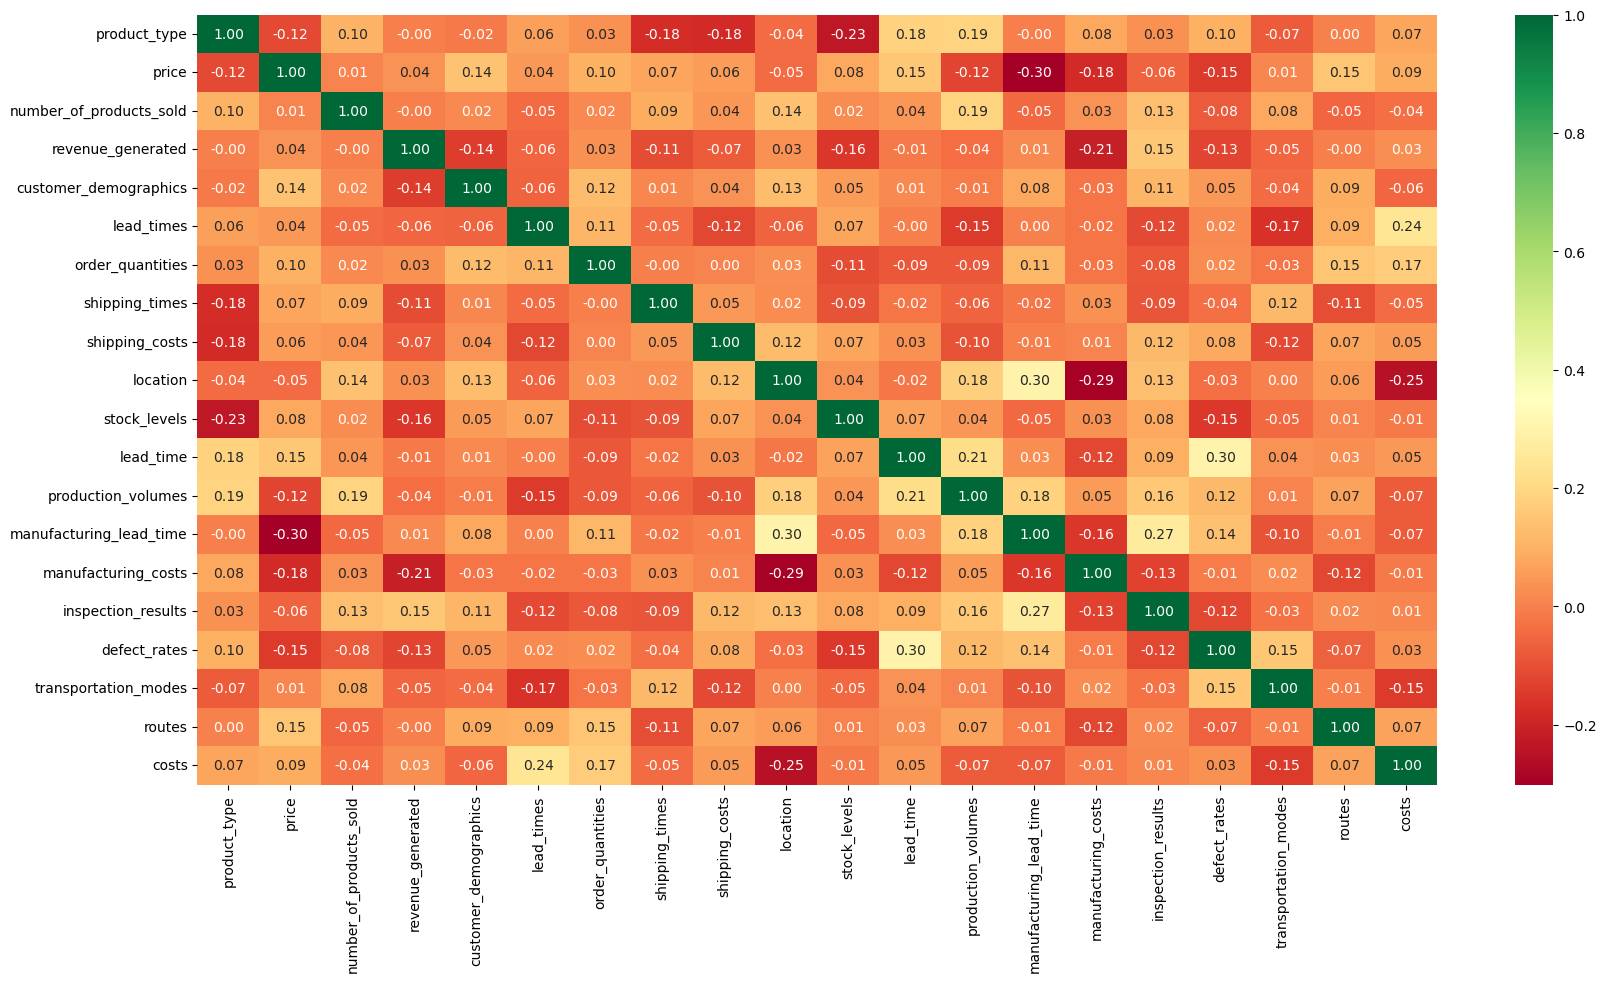

In [12]:
SC_features=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(SC_features.corr(), annot = True, fmt = '.2f', cmap = "RdYlGn")

In [13]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [14]:
MP=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]

In [15]:
sb.pairplot(MP)

In [16]:
STOCK=MP_SC[['price',
       'number_of_products_sold', 'revenue_generated', 'order_quantities',
        'shipping_costs', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'defect_rates']]
sb.pairplot(STOCK)

In [17]:
corr=STOCK.corr()
corr

price  number_of_products_sold  revenue_generated  \
price                    1.000000                 0.005739           0.038424   
number_of_products_sold  0.005739                 1.000000          -0.001641   
revenue_generated        0.038424                -0.001641           1.000000   
order_quantities         0.095819                 0.015992           0.029422   
shipping_costs           0.058543                 0.044285          -0.072892   
stock_levels             0.078261                 0.022189          -0.158480   
lead_time                0.152185                 0.041230          -0.014178   
production_volumes      -0.124575                 0.187945          -0.037441   
manufacturing_lead_time -0.301313                -0.048939           0.014073   
manufacturing_costs     -0.184123                 0.034284          -0.214025   
defect_rates            -0.147247                -0.082726          -0.125335   

                         order_quantities  shipping_costs  stock_levels  \
price                            0.095819        0.058543      0.078261   
number_of_products_sold          0.015992        0.044285      0.022189   
revenue_generated                0.029422       -0.072892     -0.158480   
order_quantities                 1.000000        0.004261     -0.111455   
shipping_costs                   0.004261        1.000000      0.072907   
stock_levels                    -0.111455        0.072907      1.000000   
lead_time                       -0.086189        0.029680      0.067880   
production_volumes              -0.086567       -0.097979      0.043763   
manufacturing_lead_time          0.112347       -0.005653     -0.050592   
manufacturing_costs             -0.026784        0.005984      0.033243   
defect_rates                     0.018986        0.083139     -0.149478   

                         lead_time  production_volumes  \
price                     0.152185           -0.124575   
number_of_products_sold   0.041230            0.187945   
revenue_generated        -0.014178           -0.037441   
order_quantities         -0.086189           -0.086567   
shipping_costs            0.029680           -0.097979   
stock_levels              0.067880            0.043763   
lead_time                 1.000000            0.212676   
production_volumes        0.212676            1.000000   
manufacturing_lead_time   0.026756            0.184457   
manufacturing_costs      -0.121999            0.051504   
defect_rates              0.297099            0.118853   

                         manufacturing_lead_time  manufacturing_costs  \
price                                  -0.301313            -0.184123   
number_of_products_sold                -0.048939             0.034284   
revenue_generated                       0.014073            -0.214025   
order_quantities                        0.112347            -0.026784   
shipping_costs                         -0.005653             0.005984   
stock_levels                           -0.050592             0.033243   
lead_time                               0.026756            -0.121999   
production_volumes                      0.184457             0.051504   
manufacturing_lead_time                 1.000000            -0.158098   
manufacturing_costs                    -0.158098             1.000000   
defect_rates                            0.139518            -0.007819   

                         defect_rates  
price                       -0.147247  
number_of_products_sold     -0.082726  
revenue_generated           -0.125335  
order_quantities             0.018986  
shipping_costs               0.083139  
stock_levels                -0.149478  
lead_time                    0.297099  
production_volumes           0.118853  
manufacturing_lead_time      0.139518  
manufacturing_costs         -0.007819  
defect_rates                 1.000000

In [18]:
COSTS=MP_SC[['price',
       'number_of_products_sold', 'revenue_generated', 'lead_times', 'order_quantities',
        'shipping_costs', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'defect_rates', 'costs']]
sb.pairplot(COSTS)

In [19]:
COSTS=MP_SC[['product_type','price',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'lead_times', 'order_quantities', 'shipping_times',
        'shipping_costs', 'location', 'stock_levels',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs']]

In [20]:
corr=COSTS.corr()
corr

product_type     price  number_of_products_sold  \
product_type                 1.000000 -0.118260                 0.104189   
price                       -0.118260  1.000000                 0.005739   
number_of_products_sold      0.104189  0.005739                 1.000000   
revenue_generated           -0.003482  0.038424                -0.001641   
customer_demographics       -0.015001  0.141159                 0.015365   
lead_times                   0.063697  0.044855                -0.046419   
order_quantities             0.031378  0.095819                 0.015992   
shipping_times              -0.177486  0.071942                 0.087315   
shipping_costs              -0.184026  0.058543                 0.044285   
location                    -0.042242 -0.045747                 0.139708   
stock_levels                -0.234523  0.078261                 0.022189   
lead_time                    0.182971  0.152185                 0.041230   
production_volumes           0.188841 -0.124575                 0.187945   
manufacturing_lead_time     -0.002508 -0.301313                -0.048939   
manufacturing_costs          0.077401 -0.184123                 0.034284   
inspection_results           0.032807 -0.060739                 0.133273   
defect_rates                 0.099739 -0.147247                -0.082726   
transportation_modes        -0.073864  0.008989                 0.075610   
routes                       0.003619  0.149359                -0.053316   
costs                        0.070671  0.088501                -0.036951   

                         revenue_generated  customer_demographics  lead_times  \
product_type                     -0.003482              -0.015001    0.063697   
price                             0.038424               0.141159    0.044855   
number_of_products_sold          -0.001641               0.015365   -0.046419   
revenue_generated                 1.000000              -0.143585   -0.057296   
customer_demographics            -0.143585               1.000000   -0.062386   
lead_times                       -0.057296              -0.062386    1.000000   
order_quantities                  0.029422               0.121561    0.105459   
shipping_times                   -0.109211               0.009490   -0.045156   
shipping_costs                   -0.072892               0.036614   -0.120746   
location                          0.033924               0.127493   -0.061358   
stock_levels                     -0.158480               0.051869    0.072571   
lead_time                        -0.014178               0.014808   -0.002818   
production_volumes               -0.037441              -0.007385   -0.145324   
manufacturing_lead_time           0.014073               0.078132    0.003364   
manufacturing_costs              -0.214025              -0.025202   -0.024441   
inspection_results                0.152314               0.107667   -0.115951   
defect_rates                     -0.125335               0.048838    0.015681   
transportation_modes             -0.052785              -0.042649   -0.169066   
routes                           -0.002071               0.088044    0.093482   
costs                             0.027252              -0.056375    0.243686   

                         order_quantities  shipping_times  shipping_costs  \
product_type                     0.031378       -0.177486       -0.184026   
price                            0.095819        0.071942        0.058543   
number_of_products_sold          0.015992        0.087315        0.044285   
revenue_generated                0.029422       -0.109211       -0.072892   
customer_demographics            0.121561        0.009490        0.036614   
lead_times                       0.105459       -0.045156       -0.120746   
order_quantities                 1.000000       -0.002561        0.004261   
shipping_times                  -0.002561        1.000000        0.045108   
shipping_costs                   

In [21]:
Product = MPSCData.groupby('product_type') 
Route = MPSCData.groupby('routes')
Customer=MPSCData.groupby('customer_demographics')
Shipping=MPSCData.groupby('shipping_carriers')
Location=MPSCData.groupby('location')
Transportation=MPSCData.groupby('transportation_modes')

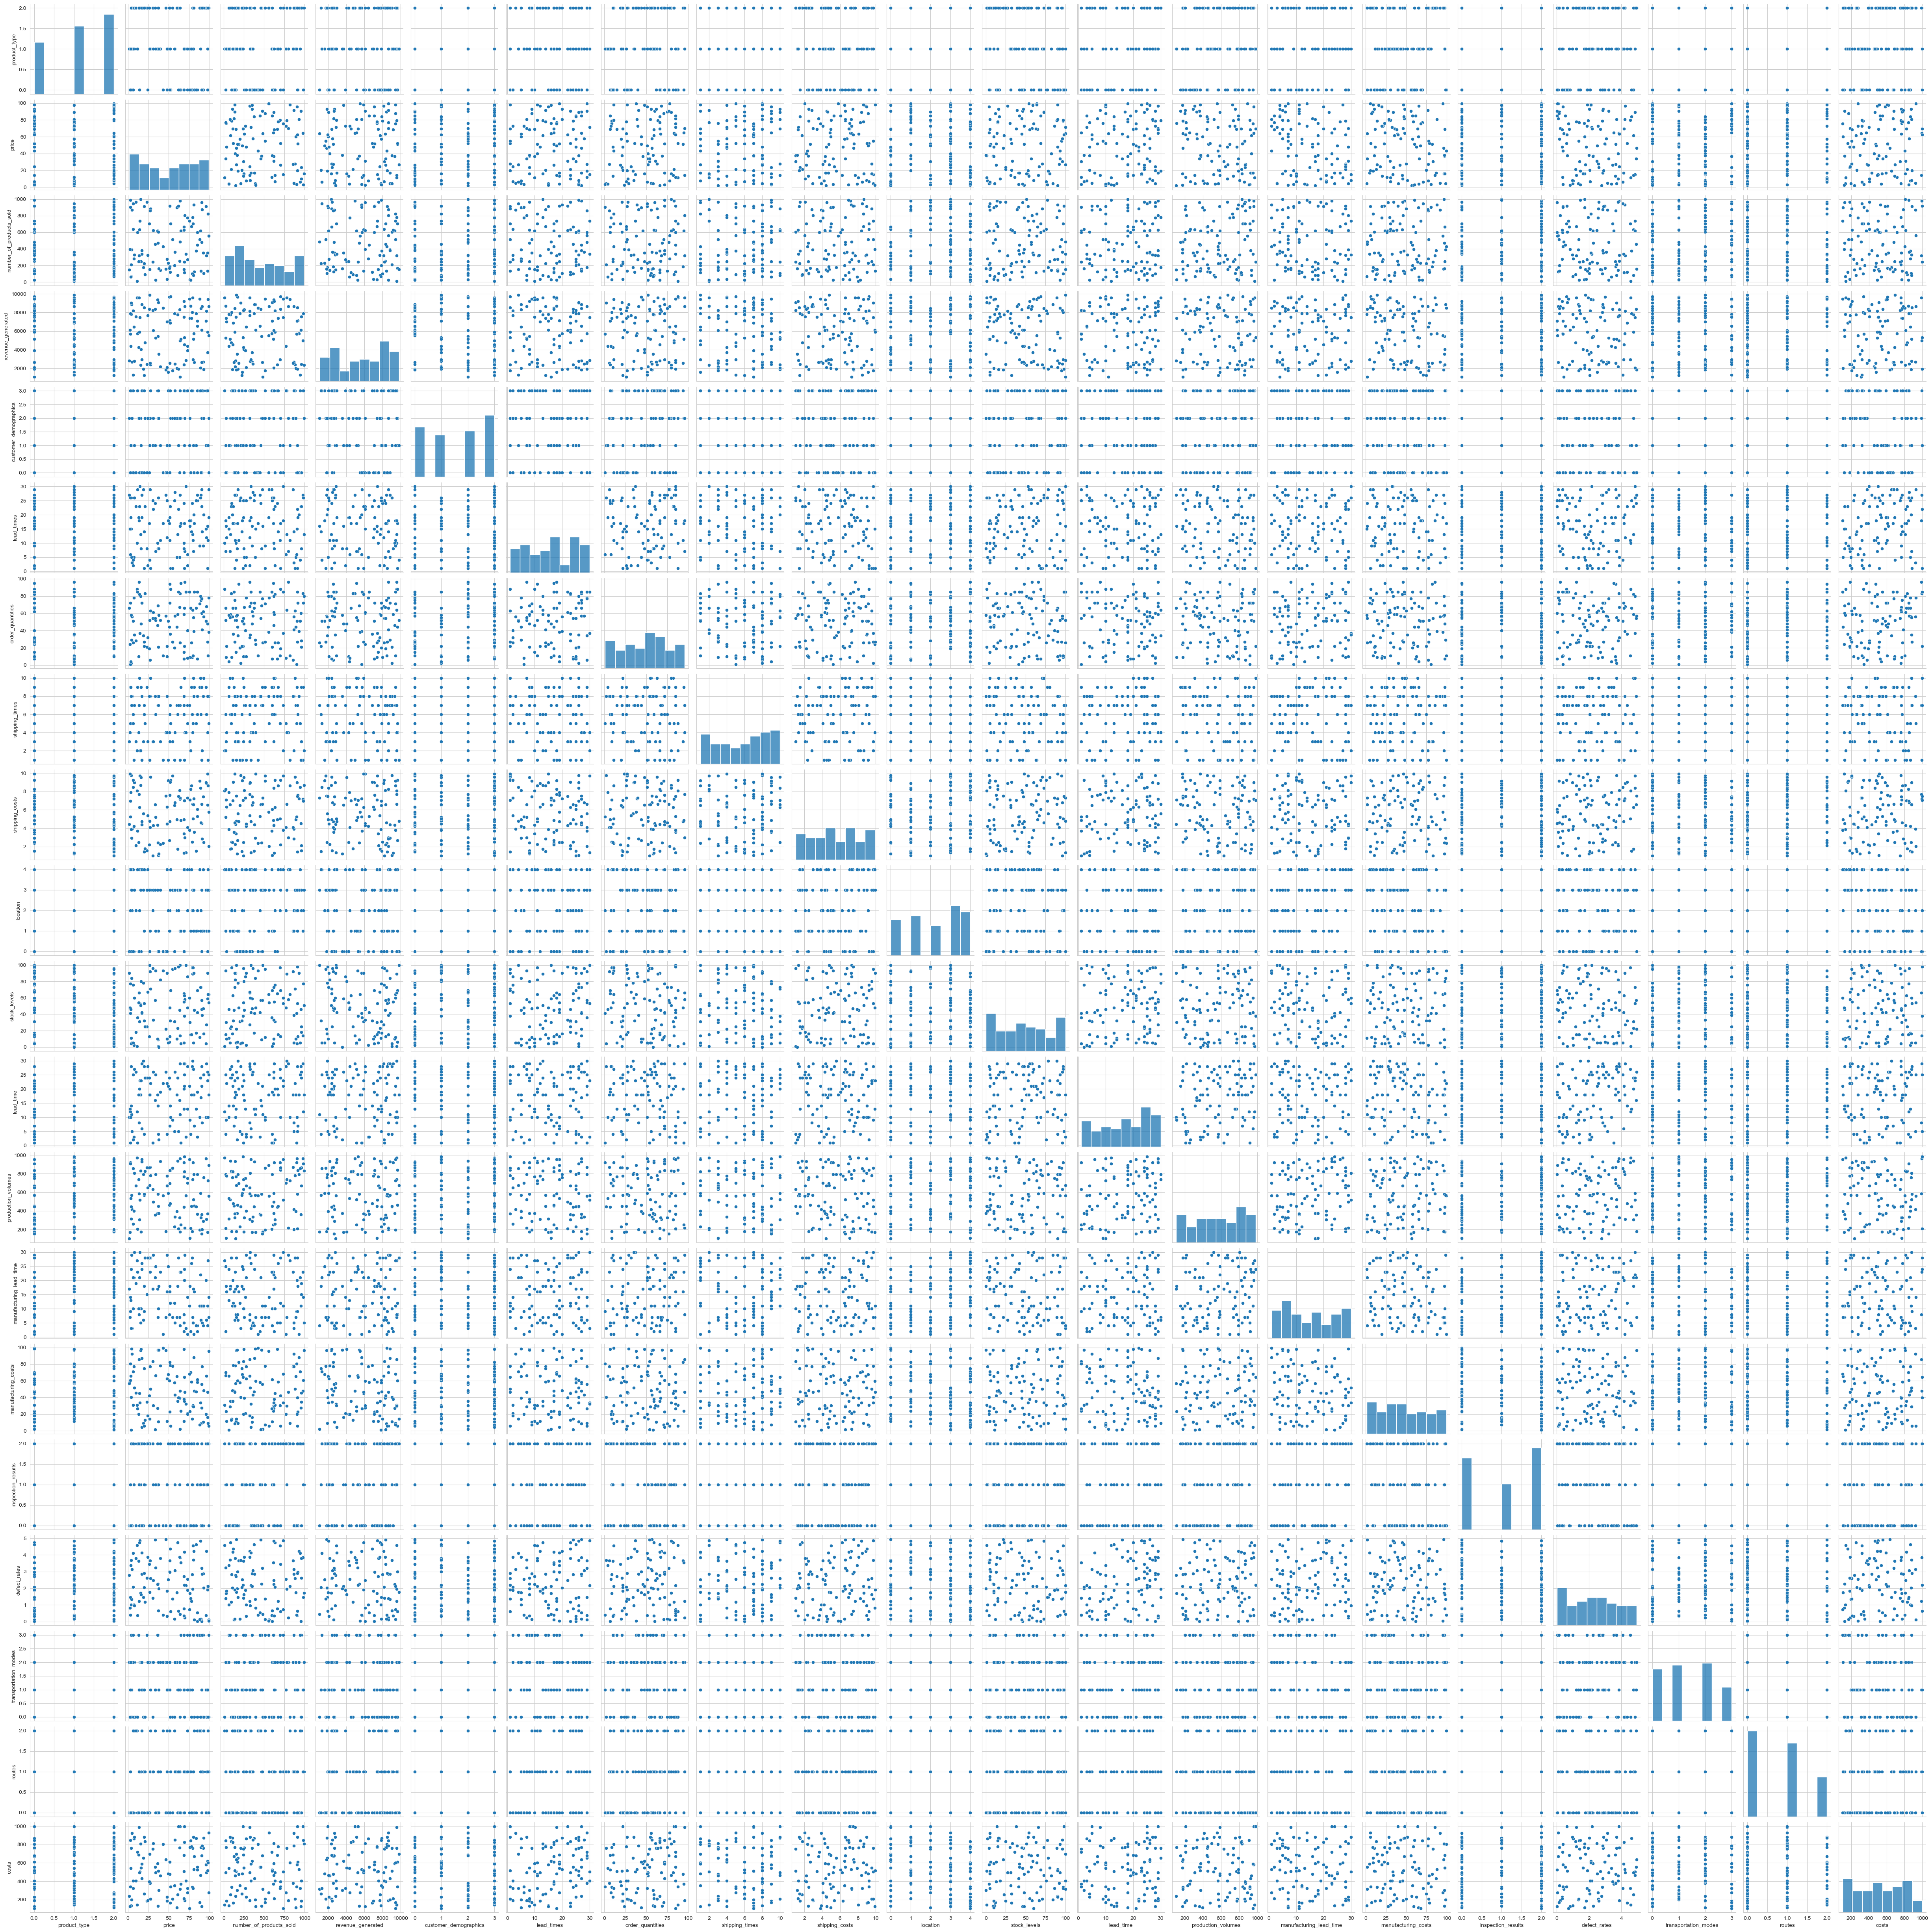

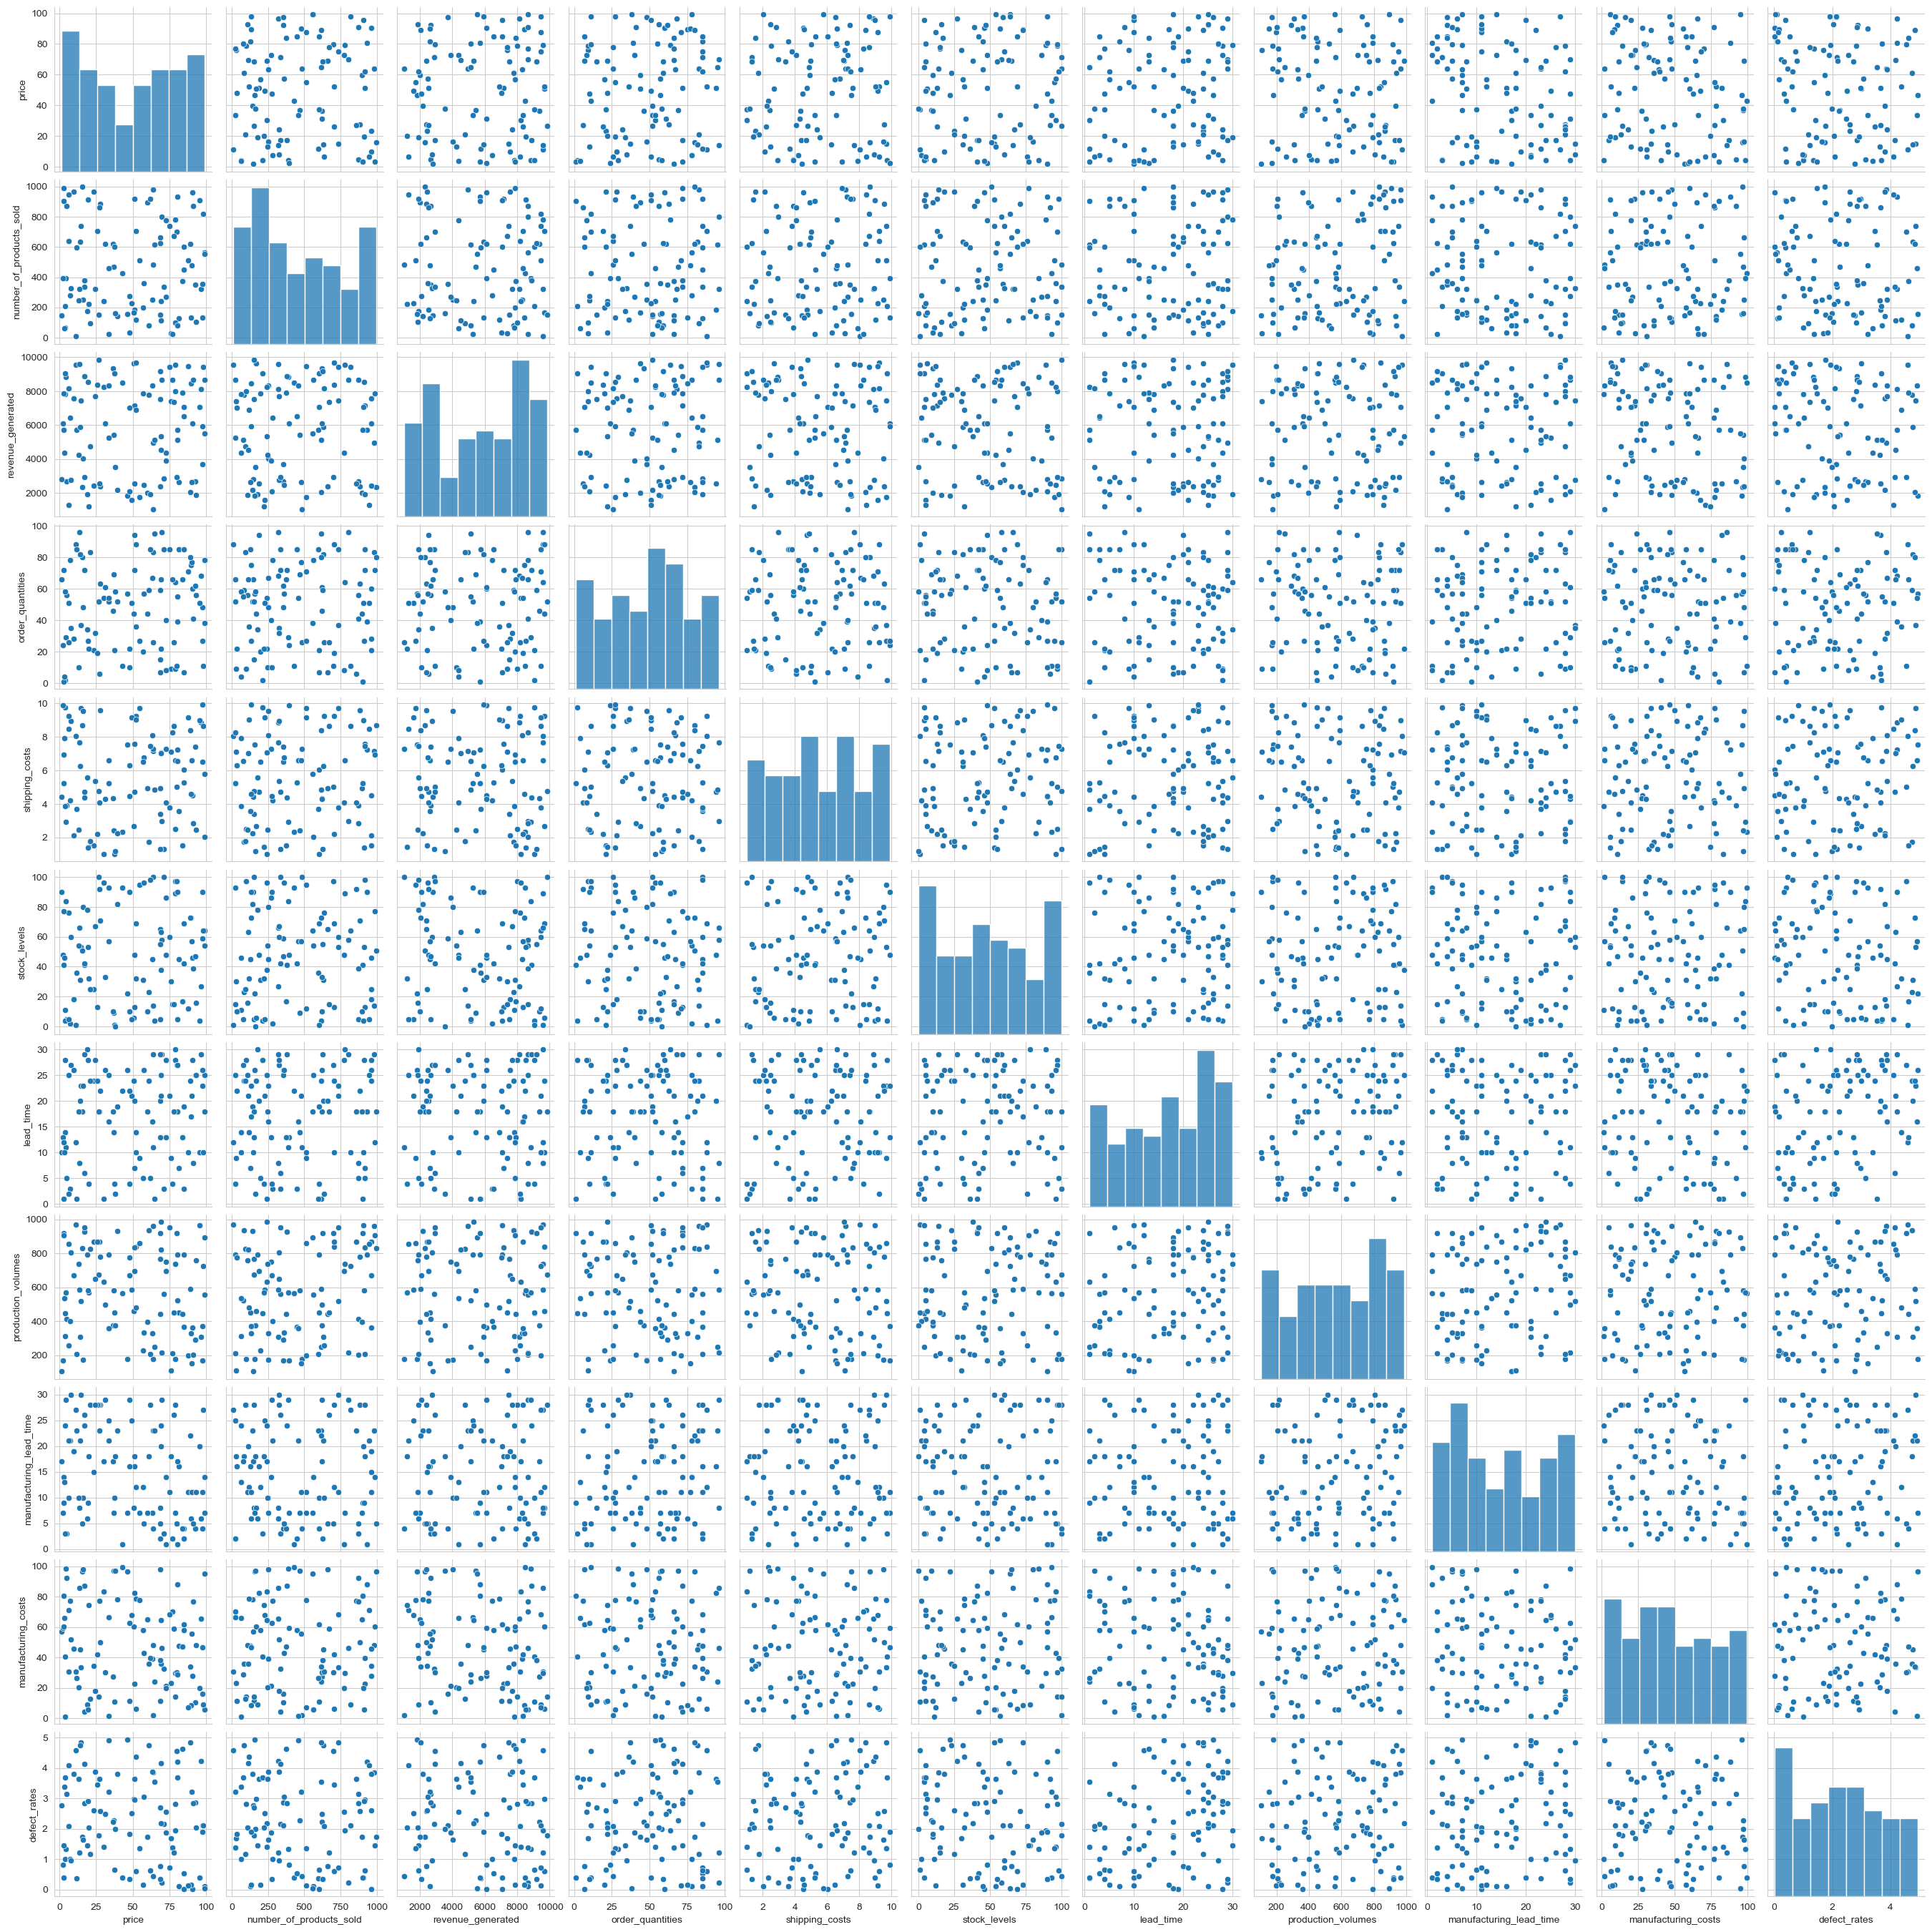

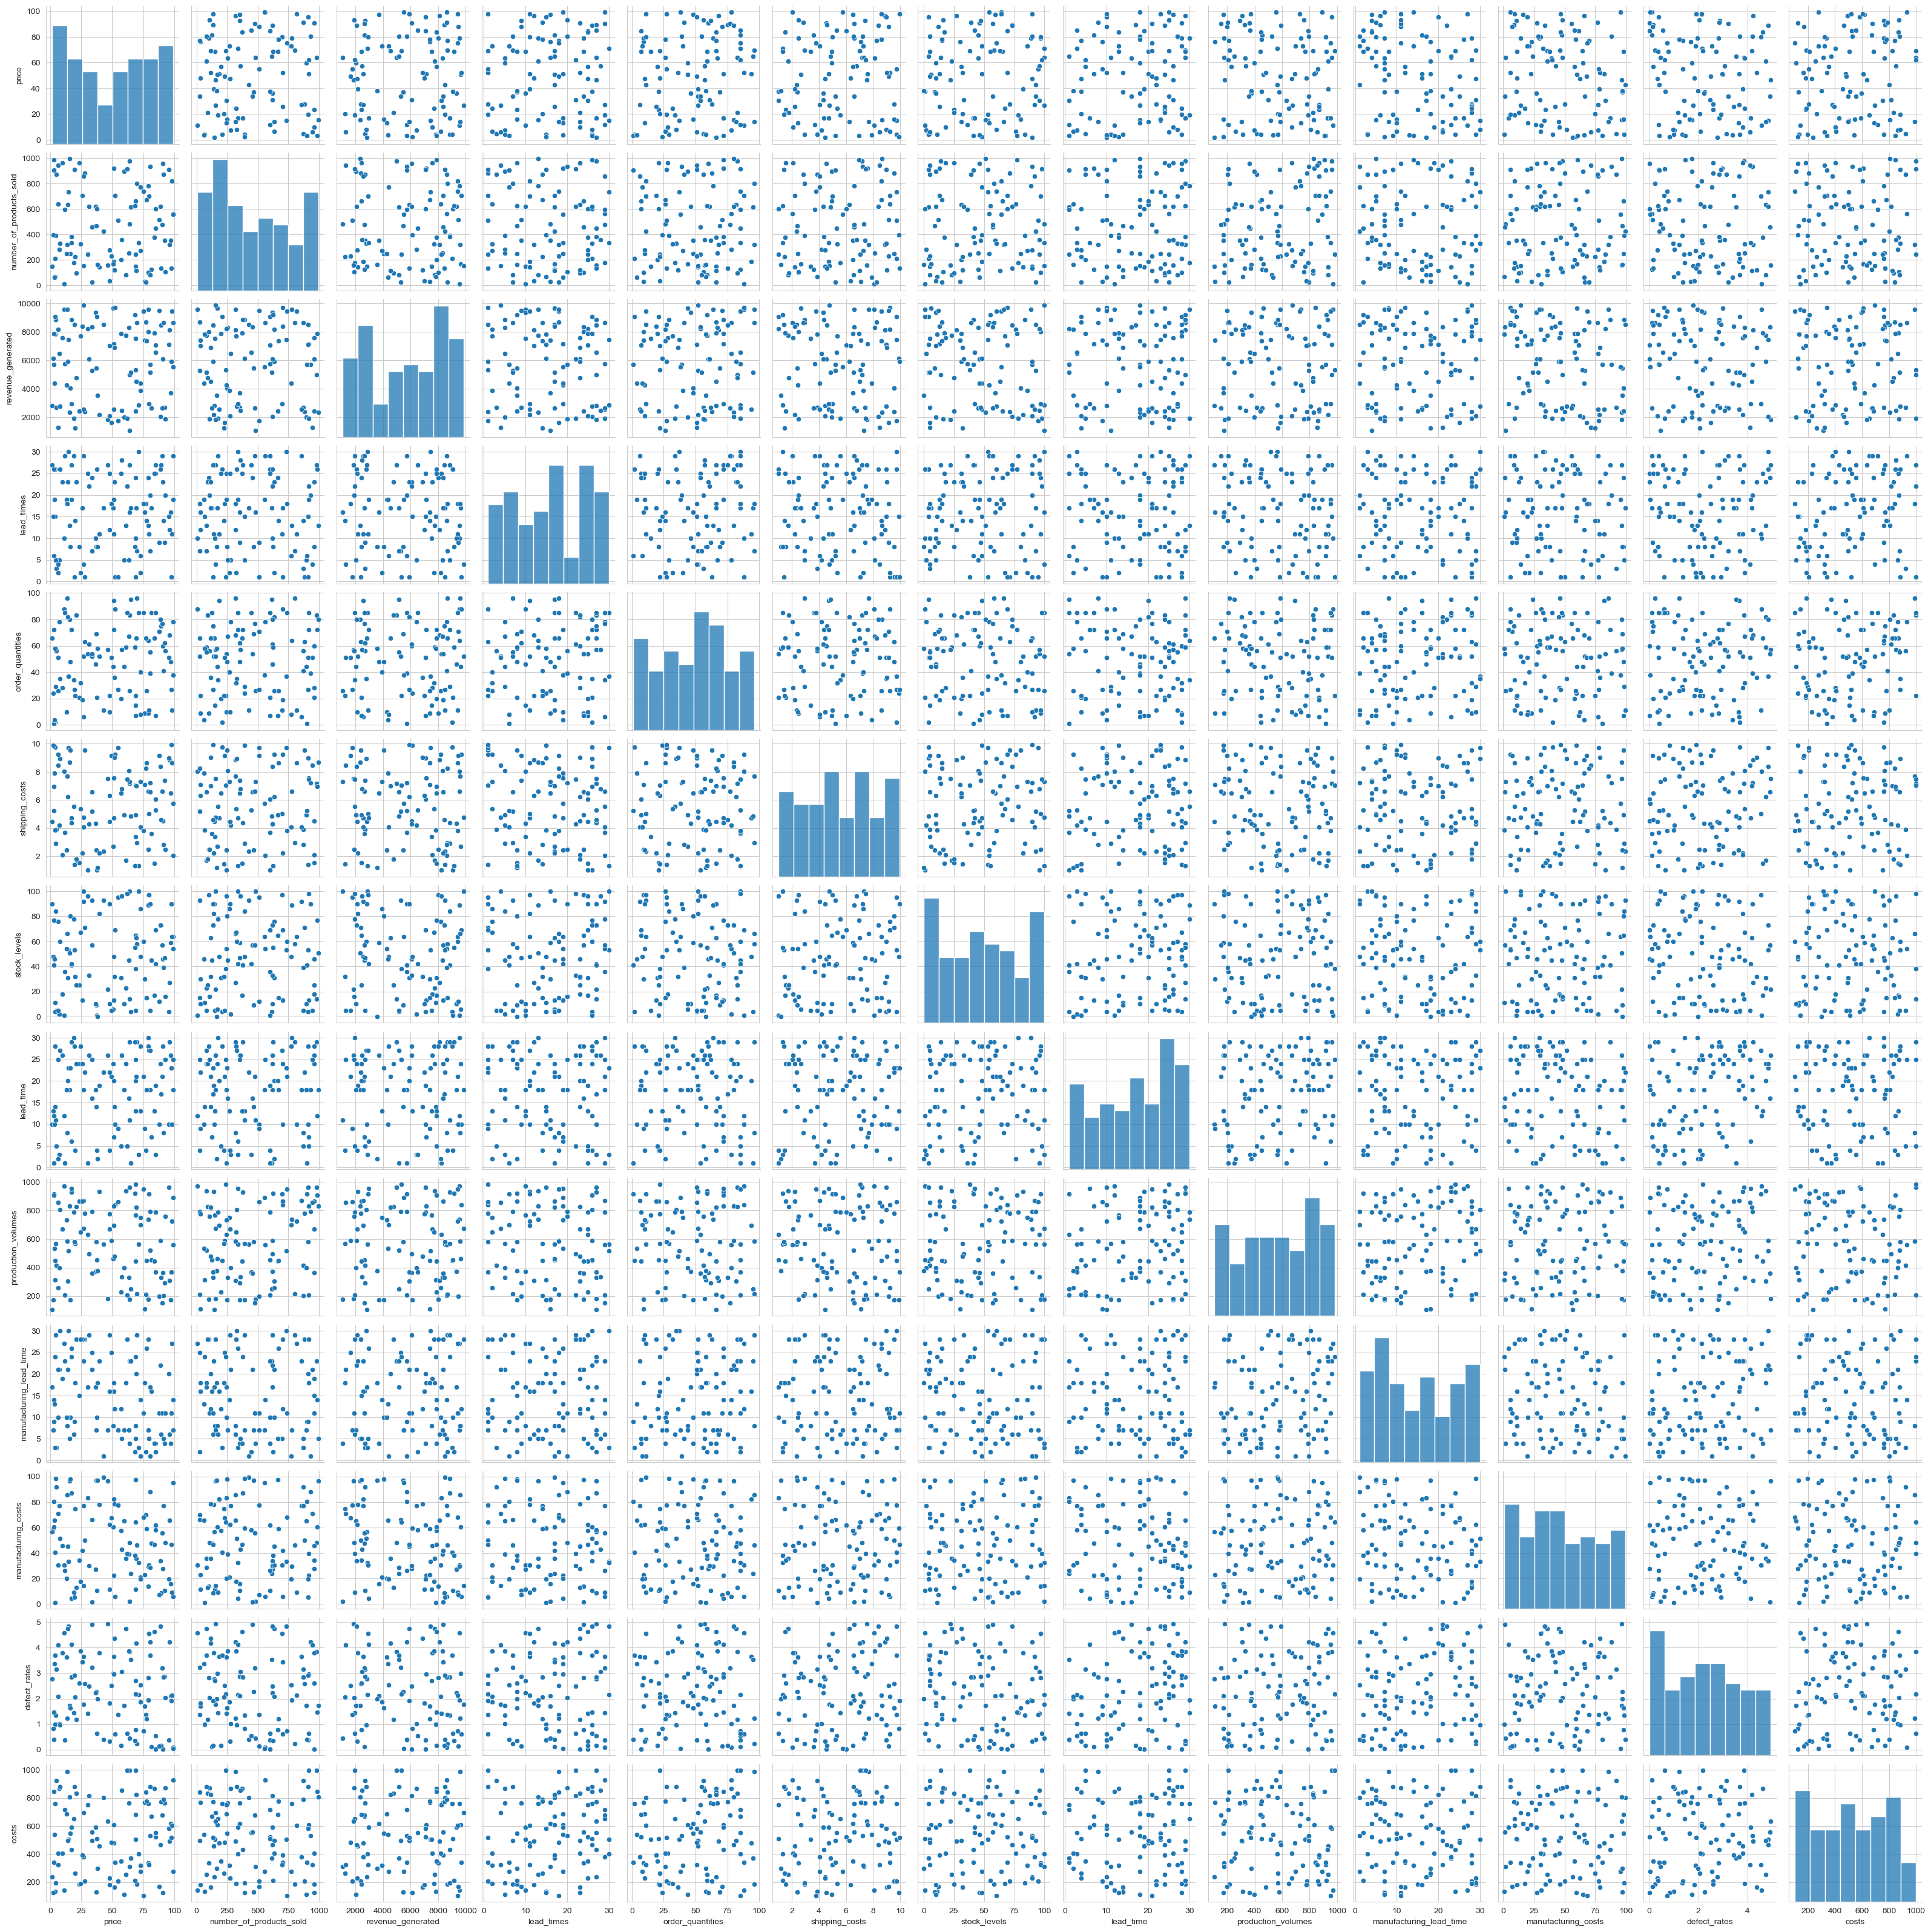

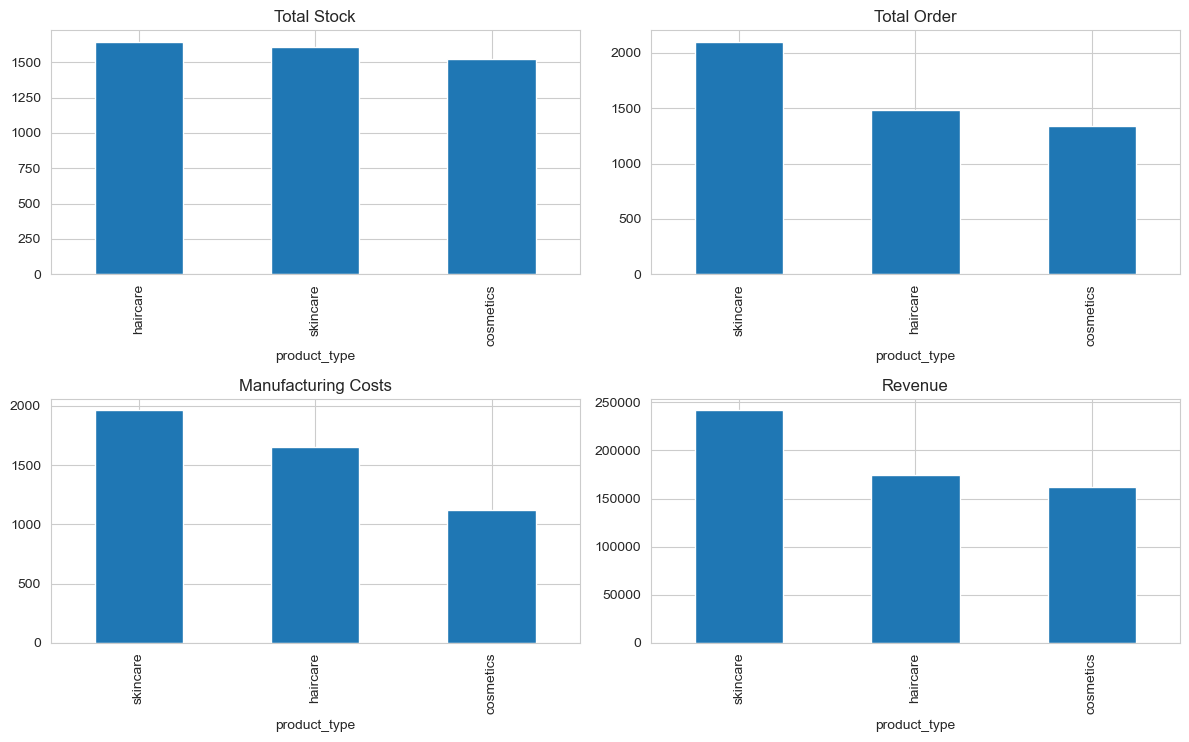

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Product['stock_levels'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Stock")

plt.subplot(4, 2, 2)
Product['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Product['manufacturing_costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Manufacturing Costs")

plt.subplot(4, 2, 4)
Product['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.tight_layout()
plt.show()

data_Products=MPSCData.groupby(['product_type'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Products, values='number_of_products_sold', names= 'product_type' , title= 'Total Number of Products Sold', 
       color='product_type',
             color_discrete_map={'cosmetics':'skyblue',
                                 'haircare':'navajowhite',
                              'skincare':'lawngreen'})



In [23]:
data_Customers=MPSCData.groupby(['customer_demographics'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Customers, values='number_of_products_sold', names= 'customer_demographics' , title= 'Customer Segment', 
       color='customer_demographics',
             color_discrete_map={'Female':'lightgreen',
                                 'Male':'blue',
                                 'Non-binary':'orange',
                              'Unknown':'crimson'})


In [24]:
Customer_Segment_by_Products= MPSCData.groupby(["customer_demographics","product_type"])["sku"].count().reset_index()
Customer_Segment_by_Products

customer_demographics product_type  sku
0                 Female    cosmetics   10
1                 Female     haircare    2
2                 Female     skincare   13
3                   Male    cosmetics    4
4                   Male     haircare   10
5                   Male     skincare    7
6             Non-binary    cosmetics    5
7             Non-binary     haircare    7
8             Non-binary     skincare   11
9                Unknown    cosmetics    7
10               Unknown     haircare   15
11               Unknown     skincare    9

In [25]:
bar_Customer_Segment_by_Products = px.bar(Customer_Segment_by_Products, x='customer_demographics', y='sku', \
    title='Customer Segment by Products',color='product_type')
bar_Customer_Segment_by_Products.show()

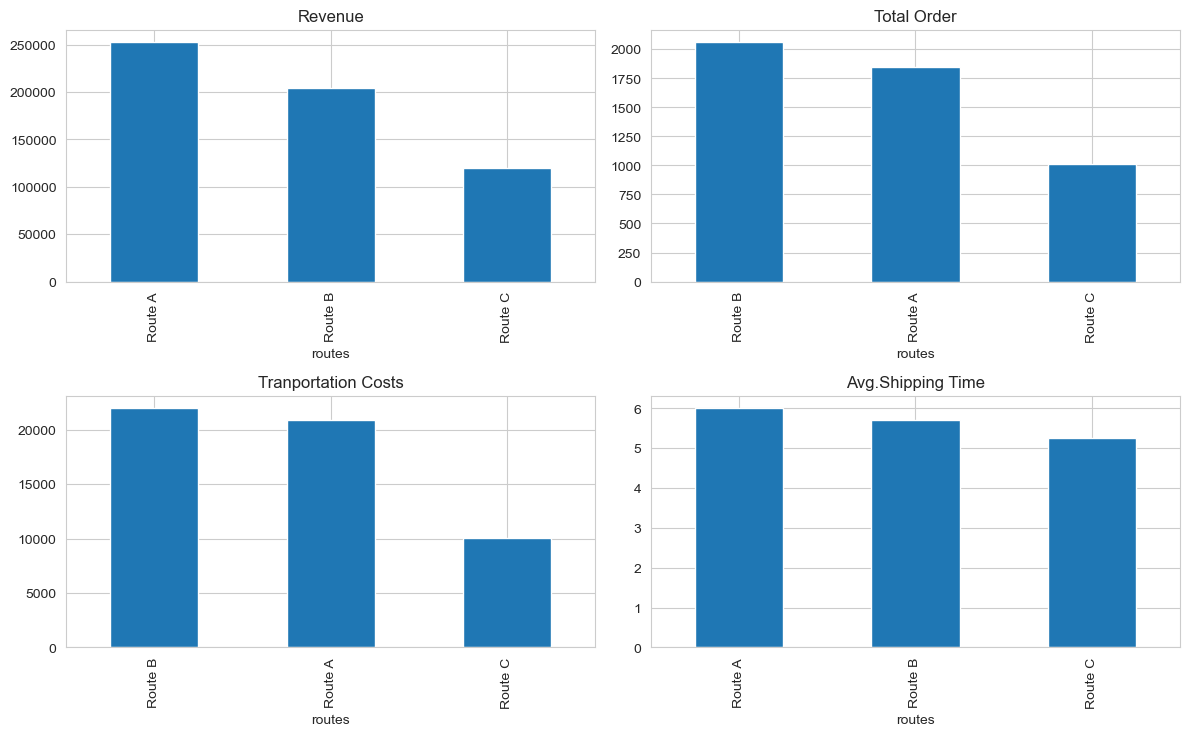

In [26]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Route['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.subplot(4, 2, 2)
Route['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Route['costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Tranportation Costs")

plt.subplot(4, 2, 4)

Route['shipping_times'].mean().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Avg.Shipping Time")

plt.tight_layout()
plt.show()


data_Routes=MPSCData.groupby(['routes'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Routes, values='number_of_products_sold', names= 'routes' , title= 'Routes', 
       color='routes',
             color_discrete_map={'Route A':'purple',
                                 'Route B':'lime',
                                 'Route C':'bisque'})

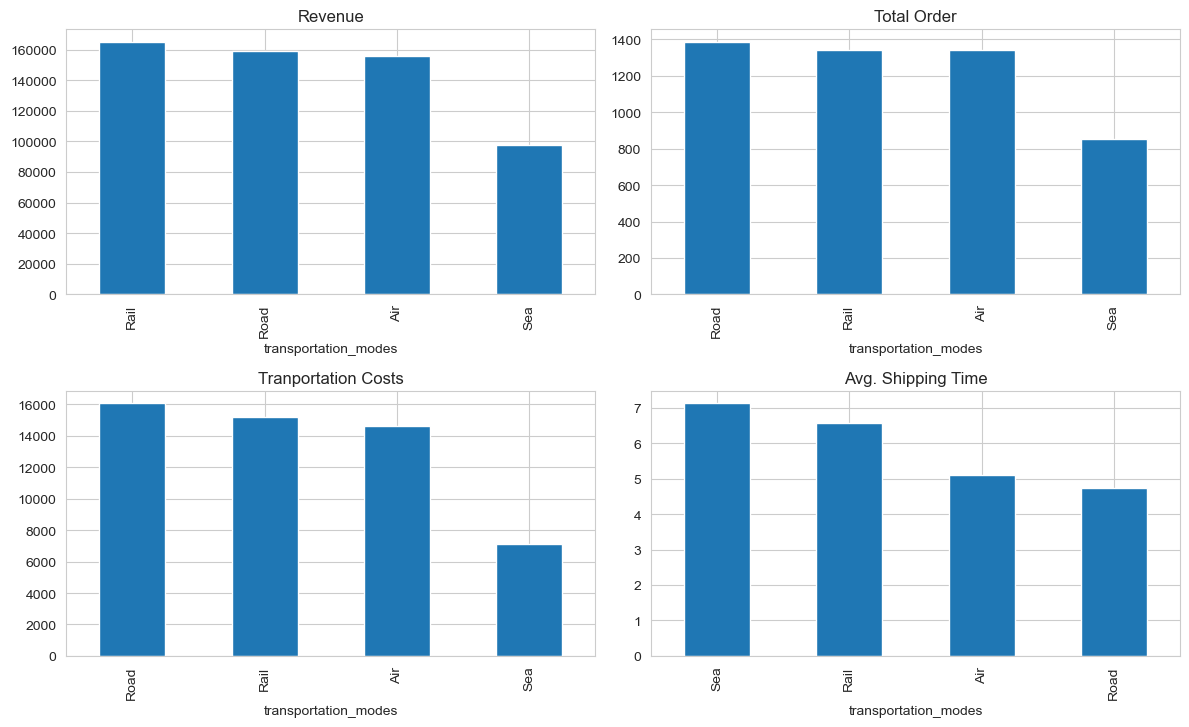

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Transportation['revenue_generated'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Revenue")

plt.subplot(4, 2, 2)
Transportation['order_quantities'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Order")

plt.subplot(4, 2, 3)
Transportation['costs'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Tranportation Costs")

plt.subplot(4, 2, 4)

Transportation['shipping_times'].mean().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Avg. Shipping Time")

plt.tight_layout()
plt.show()



data_Transportation=MPSCData.groupby(['transportation_modes'])['sku'].count().reset_index(name='number_of_products_sold').sort_values(by= 'number_of_products_sold', ascending= False)
px.pie(data_Transportation, values='number_of_products_sold', names= 'transportation_modes' , title= 'Transportation Modes', 
       color='transportation_modes',
             color_discrete_map={'Air':'deepskyblue',
                                 'Rail':'burlywood',
                                 'Road':'yellowgreen',
                              'Sea':'aquamarine'})

In [28]:
Routes_by_Transportation= MPSCData.groupby(["routes","transportation_modes"])["sku"].count().reset_index()
Routes_by_Transportation

routes transportation_modes  sku
0   Route A                  Air   11
1   Route A                 Rail   14
2   Route A                 Road   11
3   Route A                  Sea    7
4   Route B                  Air    7
5   Route B                 Rail   11
6   Route B                 Road   13
7   Route B                  Sea    6
8   Route C                  Air    8
9   Route C                 Rail    3
10  Route C                 Road    5
11  Route C                  Sea    4

In [29]:
bar_Routes_by_Transportation = px.bar(Routes_by_Transportation, x='routes', y='sku', \
    title='Routes_by_Transportation Modes',color='transportation_modes')
bar_Routes_by_Transportation.show()

In [30]:
train_MPSC = MP_SC.copy()

In [31]:
train_MPSC['lead_times']=train_MPSC['lead_times'].astype(int)
train_MPSC['shipping_times']= train_MPSC['shipping_times'].astype(int)
train_MPSC['lead_time']= train_MPSC['lead_time'].astype(int)
train_MPSC['manufacturing_lead_time']= train_MPSC['manufacturing_lead_time'].astype(int)

In [32]:
X=train_MPSC[[ 'sku', 'price',
        'revenue_generated',
        'lead_times', 'shipping_times', 'shipping_costs',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates', 'routes', 'costs']]

Y=train_MPSC[['stock_levels']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()# Scale the data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [35]:
# Evaluate the model on the testing set
Y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")


R-squared: 0.17137875821294113


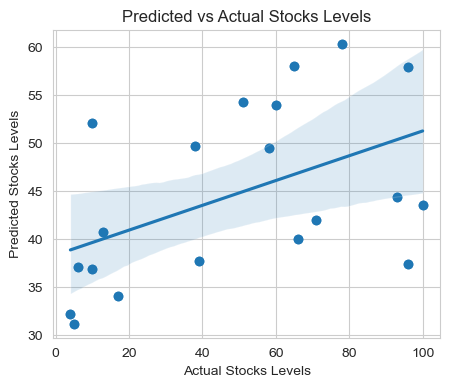

In [36]:
# Create a scatter plot with the actual Stocks Levels on the x-axis and the predicted Stocks Levels values on the y-axis
plt.scatter(Y_test, Y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=Y_test, y=Y_pred)

plt.xlabel('Actual Stocks Levels')
plt.ylabel('Predicted Stocks Levels')
plt.title('Predicted vs Actual Stocks Levels')
plt.show()

In [37]:
train_MPSC['Intercept'] = 1
X=train_MPSC[['Intercept', 'sku', 'lead_times', 'order_quantities', 'location']]

Y=train_MPSC[['costs']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()# Scale the data 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [40]:
# Evaluate the model on the testing set
Y_pred = model.predict(X_test_scaled)
r2 = r2_score(Y_test, Y_pred)
ols_model = sm.OLS(MP_SC['costs'], X)
results = ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  costs   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.796
Date:                Sat, 09 Nov 2024   Prob (F-statistic):            0.00144
Time:                        17:30:15   Log-Likelihood:                -687.61
No. Observations:                 100   AIC:                             1385.
Df Residuals:                      95   BIC:                             1398.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          354.4269     91.656      3.867      0.000     172.466     536.388
sku                  1.5393      0.853      1.804      0.074      -0.155       3.233
lead_times           6.3040      2.773      2.274      0.025       0.799      11.809
order_quantities     1.8121      0.928      1.952      0.054      -0.031       3.655
location           -42.8092     16.928     -2.529      0.013     -76.415      -9.203
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                2.874
Skew:                          -0.003   Prob(JB):                        0.238
Kurtosis:                       2.169   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

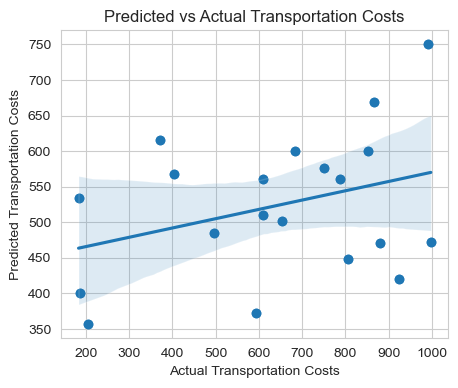

In [41]:
# Create a scatter plot with the actual Transportation Costs on the x-axis and the predicted Transportation Costs values on the y-axis
plt.scatter(Y_test, Y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=Y_test, y=Y_pred)

plt.xlabel('Actual Transportation Costs')
plt.ylabel('Predicted Transportation Costs')
plt.title('Predicted vs Actual Transportation Costs')
plt.show()

In [42]:
train_MP=MP_SC.copy()

In [43]:
sns.scatterplot(x=train_MP['sku'],y=train_MP['costs'], hue=train_MP['routes'])

<Axes: xlabel='sku', ylabel='costs'>

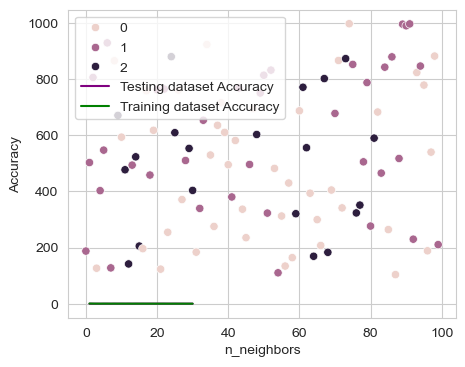

In [44]:
# Create feature and target arrays
X = train_MP[['product_type', 'sku', 'price', 'availability', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_carriers', 'shipping_costs', 'supplier_name', 'location', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'costs']]
y = train_MP[['routes']]
 
    
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)


neighbors = np.arange(1, 31)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy', color="purple")
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy', color="green")
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [45]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=30)
 
#Fit the model
knn.fit(X_train,y_train) 
#Get accuracy. 
#Note: In case of classification algorithms score method 
#represents accuracy. 
knn.score(X_test,y_test)


0.4

In [46]:
X = train_MP[['product_type', 'sku', 'price', 'availability', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_carriers', 'shipping_costs', 'supplier_name', 'location', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'costs']]
y = train_MP[['routes']]

  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
  
  # Calculate the accuracy of the model
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[3 4 1]
 [3 5 0]
 [2 2 0]]


In [47]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


In [49]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

Text(20.09722222222222, 0.5, 'Accuracy Score')